# Tensorflow Core API

## Linear Regression from Scratch

In this notebook, we will implement linear regression completely from scratch using the TF Core API and a toy dataset, as an example. The goal is to illustrate the API.


##### Import the required modules

In [1]:
import tensorflow as tf

# this is a popular plot library for python
import matplotlib.pyplot as plt
%matplotlib inline  

##### Generate some training data

Let's generate some training data. This is a toy example, so we'll generate data according to a linear model plus some noise.
Notice that `Y_train` is constructed using only TensorFlow ops thanks to operator overloading.

In [2]:
X_train=tf.constant(range(10), dtype=tf.float32)
Y_train=3*X_train + 5 + tf.random.normal(X_train.shape, 0.0, 0.1)

print("Train X:{}".format(X_train))
print("Train Y:{}".format(Y_train))

Train X:[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Train Y:[ 4.9346714  8.06258   10.843995  13.929844  16.882318  19.862448
 22.85812   26.058935  28.926424  32.07893  ]


##### Generate some test data

Let's generate two more tensors for testing, in the same way.

In [3]:
X_test=tf.constant(range(10, 20), dtype=tf.float32)
Y_test=3 * X_test + 5 + tf.random.normal(X_test.shape, 0.0, 0.1)

print("Test X:{}".format(X_test))
print("Test Y:{}".format(Y_test))

Test X:[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Test Y:[34.912457 38.060413 40.98639  44.01878  47.043667 50.16562  53.15483
 56.04199  59.243713 61.808945]


##### Define the model

Let us define our model using a Python function as: $$Y = w_1 X + w_0$$

In [4]:
def my_model(X, w0, w1):
    return w1*X + w0

##### Define the loss function

Let us define a loss function to train the model. Since this is a regression problem, we'll use the Mean Squared Error (MSE) loss. Notice that the MSE is already defined in `tf.losses` and we could have used that, but here we're re-inventing the wheel to show you the entire process from scratch.

In [14]:
def loss_mse(Y_real, Y_pred):
    return tf.reduce_mean((Y_real-Y_pred)**2)

##### Define a training step

Let us define a function that performs the forward and backward passes of gradient-based training. This function calculates the output of the model and the corresponding loss function (forward pass). Then it computes the gradient of the loss with respect to the model parameters `w0` and `w1` (backward pass).

In [19]:
def compute_gradients(X, Y, w0, w1):
    with tf.GradientTape() as tape:
        Y_pred = my_model(X, w0, w1)
        loss=loss_mse(Y, Y_pred)
    return tape.gradient(loss, [w0, w1])

##### Build the training loop

Now let us put the pieces together to construct the training loop. First let us initialize some constants, such as the learning rate and the number of training steps to perform.

In [20]:
STEPS=1000
LEARNING_RATE=.01

Then let us declare two `tf.Variable` objects to store the values of our trainable weights. Remember: we initialize weights to 0 because this is linear regression. Never do so in a Neural Network.

In [21]:
w0=tf.Variable(0.0)
w1=tf.Variable(0.0)

Lastly, let us execute the training loop, printing the current status every 100 steps.

In [23]:
for i in range(STEPS):
    dw0, dw1 = compute_gradients(X_train, Y_train, w0, w1)
    w0.assign_sub(dw0 * LEARNING_RATE)
    w1.assign_sub(dw1 * LEARNING_RATE)

    if i % 100 == 0:
        Y_hat_train = my_model(X_train, w0, w1)
        loss = loss_mse(Y_train, Y_hat_train)
        print("Step {}, Loss: {}, w0: {}, w1: {}\n".format(i, loss, w0.numpy(), w1.numpy()))


Step 0, Loss: 17.512985229492188, w0: 0.5363239049911499, w1: 3.0500659942626953

Step 100, Loss: 1.7104791402816772, w0: 2.4859352111816406, w1: 3.3939990997314453

Step 200, Loss: 0.5557964444160461, w0: 3.534740924835205, w1: 3.226741313934326

Step 300, Loss: 0.18378546833992004, w0: 4.130048751831055, w1: 3.1318047046661377

Step 400, Loss: 0.06393183767795563, w0: 4.467950820922852, w1: 3.0779178142547607

Step 500, Loss: 0.025318380445241928, w0: 4.6597442626953125, w1: 3.0473318099975586

Step 600, Loss: 0.012878085486590862, w0: 4.768606185913086, w1: 3.02997088432312

Step 700, Loss: 0.008870053105056286, w0: 4.8303985595703125, w1: 3.0201165676116943

Step 800, Loss: 0.0075787706300616264, w0: 4.86547327041626, w1: 3.0145230293273926

Step 900, Loss: 0.007162799593061209, w0: 4.885380744934082, w1: 3.011348247528076



##### Analyze Results

As you can see, the loss is decreasing as expected, and the values of `w1` and `w0` are approaching 5 and 3 respectively, which are those of the model used to generate the data.

Notice that this is, again, a toy example, so we don't have mini-batches, validation sets, etc.

Let us evaluate our loss on test data.

In [26]:
Y_pred_test = my_model(X_test, w0, w1)
loss=loss_mse(Y_test, Y_pred_test)
print(loss.numpy())

0.014091331


##### Visualize Results

Finally, let us plot the real and predicted test samples.

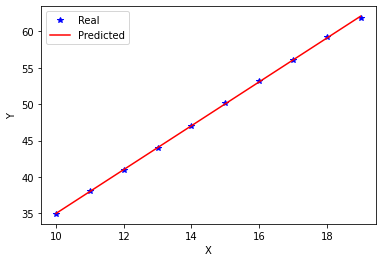

In [27]:
Y_hat_test = my_model(X_test, w0, w1)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X_test, Y_test, 'b*')
ax.plot(X_test, Y_hat_test, 'r-')
ax.legend(['Real', 'Predicted'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()